In [0]:
# Step 1: Load the dataset.
 
from keras.datasets import imdb
max_features = 10000
maxlen = 500
 
(train_data, y_train), (test_data, y_test) = imdb.load_data(num_words=max_features)
print('Number of train sequences: ', len(train_data))
print('Number of test sequences: ', len(test_data))
 
# Step 2: Pad sequences so that each sequence has the same number characters.
from keras.preprocessing import sequence
train_data = sequence.pad_sequences(train_data, maxlen=maxlen)
test_data = sequence.pad_sequences(test_data, maxlen=maxlen)
 
# Step 3: Define and compile model using SimpleRNN with 32 hidden units.
 
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import SimpleRNN

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
 
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
 
history = model.fit(train_data, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)
 
# Step 5: Plot the validation and training accuracy and losses.
 
import matplotlib.pyplot as plt
 
def plot_results(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
 
    plt.title('Training and validation Accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation Loss')
    plt.legend()
    plt.show()
                      
                       

Using TensorFlow backend.


17465344/17464789 [==============================] - 1s 0us/step
Number of train sequences:  25000
Number of test sequences:  25000
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 17s 865us/step - loss: 0.6398 - acc: 0.6154 - val_loss: 0.4606 - val_acc: 0.8042
Epoch 2/10
20000/20000 [==============================] - 17s 870us/step - loss: 0.4283 - acc: 0.8167 - val_loss: 0.4859 - val_acc: 0.7692
Epoch 3/10
20000/20000 [==============================] - 17s 834us/step - loss: 0.3077 - acc: 0.8760 - val_loss: 0.4644 - val_acc: 0.7842
Epoch 4/10
20000/20000 [==============================] - 17s 838us/step - loss: 0.2524 - acc: 0.9002 - val_loss: 0.3609 - val_acc: 0.8448
Epoch 5/10
20000/20000 [==============================] - 17s 840us/step - loss: 0.1927 - acc: 0.9269 - val_loss: 0.4077 - val_acc: 0.8592
Epoc

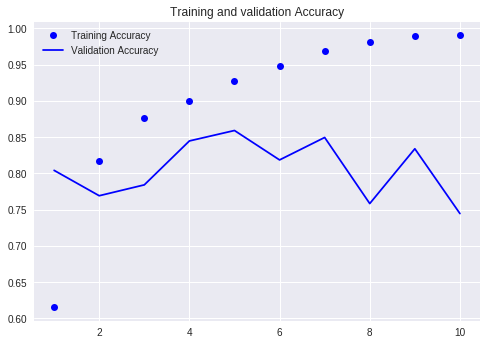

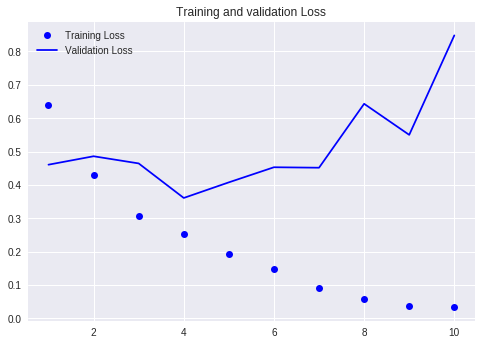

In [0]:
plot_results(history) 